___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [1]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

In [3]:
import xgboost
xgboost.__version__

'1.7.3'

In [4]:
import sklearn
sklearn.__version__

'1.4.1.post1'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [5]:
dff=pd.read_csv('ANSUR II FEMALE Public.csv')
dff.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
DODRace,2,3,1,2,1
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195


In [6]:
dff.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    SubjectId                       1986 non-null   int64 
 1    abdominalextensiondepthsitting  1986 non-null   int64 
 2    acromialheight                  1986 non-null   int64 
 3    acromionradialelength           1986 non-null   int64 
 4    anklecircumference              1986 non-null   int64 
 5    axillaheight                    1986 non-null   int64 
 6    balloffootcircumference         1986 non-null   int64 
 7    balloffootlength                1986 non-null   int64 
 8    biacromialbreadth               1986 non-null   int64 
 9    bicepscircumferenceflexed       1986 non-null   int64 
 10   bicristalbreadth                1986 non-null   int64 
 11   bideltoidbreadth                1986 non-null   int64 
 12   bimalleolarbreadth              

In [7]:
dff.shape

(1986, 108)

In [8]:
dfm=pd.read_csv('ANSUR II MALE Public.csv',encoding='latin-1')
dfm.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [9]:
dfm.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       4082 non-null   int64 
 1    abdominalextensiondepthsitting  4082 non-null   int64 
 2    acromialheight                  4082 non-null   int64 
 3    acromionradialelength           4082 non-null   int64 
 4    anklecircumference              4082 non-null   int64 
 5    axillaheight                    4082 non-null   int64 
 6    balloffootcircumference         4082 non-null   int64 
 7    balloffootlength                4082 non-null   int64 
 8    biacromialbreadth               4082 non-null   int64 
 9    bicepscircumferenceflexed       4082 non-null   int64 
 10   bicristalbreadth                4082 non-null   int64 
 11   bideltoidbreadth                4082 non-null   int64 
 12   bimalleolarbreadth              

In [10]:
dfm.shape

(4082, 108)

## Explore Data

In [11]:
df0=pd.concat([dff,dfm], axis=0, ignore_index=True)
df0.head().T

,0,1,2,3,4
SubjectId,10037.0,10038.0,10042.0,10043.0,10051.0
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195
WritingPreference,Right hand,Right hand,Right hand,Right hand,Right hand


In [12]:
df0.shape

(6068, 109)

In [13]:
df0.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    SubjectId                       1986 non-null   float64
 1    abdominalextensiondepthsitting  6068 non-null   int64  
 2    acromialheight                  6068 non-null   int64  
 3    acromionradialelength           6068 non-null   int64  
 4    anklecircumference              6068 non-null   int64  
 5    axillaheight                    6068 non-null   int64  
 6    balloffootcircumference         6068 non-null   int64  
 7    balloffootlength                6068 non-null   int64  
 8    biacromialbreadth               6068 non-null   int64  
 9    bicepscircumferenceflexed       6068 non-null   int64  
 10   bicristalbreadth                6068 non-null   int64  
 11   bideltoidbreadth                6068 non-null   int64  
 12   bimalleolarbreadth

In [14]:
df0.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference', 'subjectid'],
      dtype='object', length=109)

In [15]:
df0['DODRace'].value_counts(dropna=False) #target feature

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [16]:
df0['Ethnicity'].value_counts(dropna=False)

Ethnicity
NaN                                  4647
Mexican                               357
Puerto Rican                          183
Caribbean Islander                    124
Filipino                               67
                                     ... 
Creek Samoan                            1
Omaha                                   1
Algonquin Navajo Penobscot              1
Undisclosed Native American Tribe       1
Blackfoot Cherokee Choctaw              1
Name: count, Length: 210, dtype: int64

In [17]:
df0['Gender'].value_counts(dropna=False)

Gender
Male      4082
Female    1986
Name: count, dtype: int64

In [18]:
df0['SubjectNumericRace'].value_counts(dropna=False)

SubjectNumericRace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: count, dtype: int64

In [19]:
df0['SubjectsBirthLocation'].value_counts(dropna=False)

SubjectsBirthLocation
California    446
New York      420
Texas         397
Indiana       266
Oklahoma      221
             ... 
Zambia          1
Bahamas         1
Serbia          1
Sri Lanka       1
Guatemala       1
Name: count, Length: 152, dtype: int64

In [20]:
df0['Installation'].value_counts(dropna=False)

Installation
Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: count, dtype: int64

In [21]:
df0['Component'].value_counts(dropna=False)

Component
Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: count, dtype: int64

In [22]:
df0['PrimaryMOS'].value_counts(dropna=False)

PrimaryMOS
11B     671
88M     320
92A     288
91B     230
68W     222
       ... 
270A      1
356H      1
35Q       1
61F       1
91l       1
Name: count, Length: 285, dtype: int64

In [23]:
df0['WritingPreference'].value_counts(dropna=False)

WritingPreference
Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: count, dtype: int64

In [24]:
df0['Branch'].value_counts(dropna=False)

Branch
Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: count, dtype: int64

In [25]:
df=df0.copy()

In [26]:
df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN


In [27]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    SubjectId                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

### Dropping

In [28]:
df=df.drop(columns=['SubjectId', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'subjectid', 'WritingPreference','Age' ])
#bu feature larin modelin tahmininde önemli rol oynadigini düsünmedigimden siliyorum.

In [29]:
df.shape

(6068, 97)

In [30]:
df.duplicated().sum()

0

### Multicollinearity

In [31]:
df_numeric=df.select_dtypes(include ="number")
df_numeric.corr().iloc[1:, 1:]

,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Heightin,Weightlbs
acromialheight,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,0.409043,0.633088,...,0.413142,0.371948,0.604967,0.933248,0.684610,0.734622,0.922687,-0.235121,0.944577,0.702188
acromionradialelength,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,0.351546,0.566667,...,0.364133,0.338024,0.481149,0.851464,0.603964,0.646149,0.684979,-0.201095,0.831055,0.620289
anklecircumference,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,0.453308,0.645015,...,0.569306,0.517324,0.479788,0.420109,0.745950,0.702178,0.514394,-0.158360,0.499770,0.730350
axillaheight,0.987452,0.862074,0.469964,1.000000,0.657168,0.790214,0.707868,0.465773,0.369885,0.566833,...,0.337927,0.301106,0.565922,0.948190,0.621812,0.687252,0.905063,-0.229070,0.939310,0.642230
balloffootcircumference,0.693403,0.605970,0.711720,0.657168,1.000000,0.745857,0.738107,0.665110,0.340423,0.717358,...,0.493328,0.462661,0.544655,0.621127,0.731982,0.826903,0.628475,-0.108116,0.691724,0.739781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,0.734622,0.646149,0.702178,0.687252,0.826903,0.745770,0.803476,0.765347,0.350715,0.807343,...,0.579536,0.557457,0.614334,0.637957,0.801215,1.000000,0.663991,-0.181502,0.733900,0.808248
wristheight,0.922687,0.684979,0.514394,0.905063,0.628475,0.689499,0.624097,0.505623,0.465766,0.593600,...,0.446004,0.396134,0.615569,0.817358,0.671151,0.663991,1.000000,-0.257819,0.854877,0.680122
DODRace,-0.235121,-0.201095,-0.158360,-0.229070,-0.108116,-0.113672,-0.124767,-0.066587,-0.157624,-0.093332,...,-0.103039,-0.082569,-0.140695,-0.212210,-0.133350,-0.181502,-0.257819,1.000000,-0.227227,-0.135988
Heightin,0.944577,0.831055,0.499770,0.939310,0.691724,0.797004,0.756733,0.510416,0.357377,0.610767,...,0.351431,0.312977,0.576376,0.905858,0.636173,0.733900,0.854877,-0.227227,1.000000,0.659988


In [32]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'blue'
    return f'color: {color}'
pd.DataFrame(df_numeric).corr().style.applymap(color_red)

In [33]:
corr_matrix = df.corr(numeric_only=True)
high_corr_with_dodrace = corr_matrix['DODRace'][abs(corr_matrix['DODRace']) > 0.6]
high_corr_with_dodrace # DODRace ile yüksek korelasyonlu bir feature olmadigini görüyoruz.

DODRace    1.0
Name: DODRace, dtype: float64

In [34]:
df.drop(columns=['axillaheight', 'kneeheightsitting', 'tenthribheight', 'suprasternaleheight', 'waistheightomphalion', 'crotchheight', 'iliocristaleheight', 'cervicaleheight', 'sleeveoutseam'],axis=1, inplace=True)

In [35]:
df_numeric=df.select_dtypes(include ="number")
pd.DataFrame(df_numeric).corr().style.applymap(color_red)

In [36]:
df.drop(columns=['Weightlbs', 'Heightin'], axis=1, inplace=True) # bu columnlari karsilayan baska columnlar var.

In [37]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [38]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
       'handcircumference', 'handlength', 'headbreadth', 

In [39]:
df['DODRace'].value_counts(dropna=False, normalize=True)

DODRace
White               0.624918
Black               0.213909
Hispanic            0.111898
Asian               0.030982
Pacific Islander    0.009723
Native American     0.008075
Other               0.000494
Name: proportion, dtype: float64

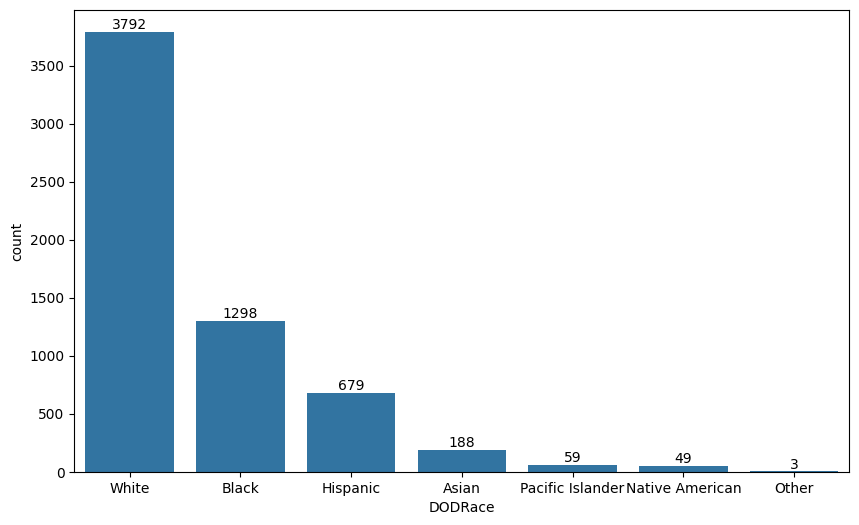

In [40]:
ax = sns.countplot(x="DODRace", data = df, order=df['DODRace'].value_counts().index)
ax.bar_label(ax.containers[0]);

In [41]:
df=df.loc[(df['DODRace']== 'White')| (df['DODRace']== 'Black') | (df['DODRace']=='Hispanic')]

In [42]:
df['DODRace'].value_counts(dropna=False)

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [43]:
df.head().T

,0,1,2,3,4
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
balloffootcircumference,222,225,237,240,217
...,...,...,...,...,...
weightkg,657,534,663,782,886
wristcircumference,152,155,162,173,152
wristheight,756,815,799,818,762
Gender,Female,Female,Female,Female,Female


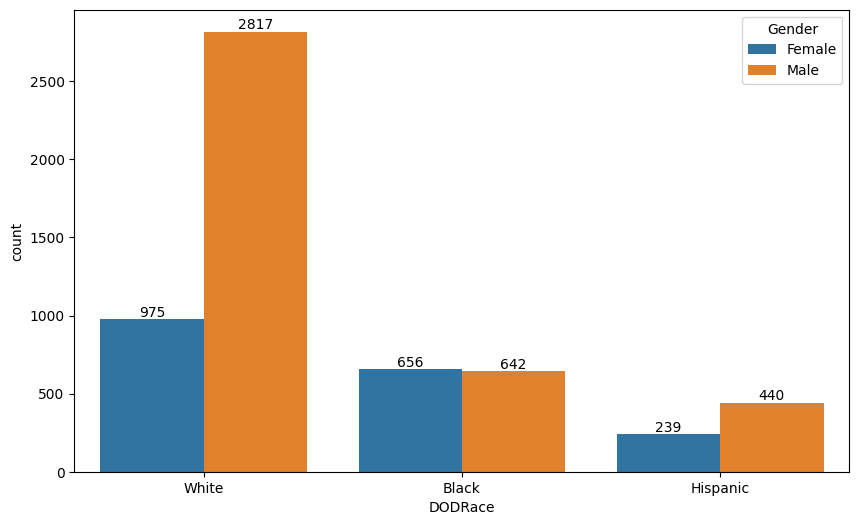

In [44]:
ax = sns.countplot(x="DODRace",hue='Gender', data = df, order=df['DODRace'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

In [45]:
df.shape

(5769, 86)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
...,...,...,...,...,...,...,...,...
waistdepth,5769.0,230.459178,35.691681,138.0,204.0,226.0,253.0,406.0
waistfrontlengthsitting,5769.0,377.352054,31.714316,289.0,355.0,376.0,398.0,494.0
weightkg,5769.0,800.981106,155.990338,358.0,686.0,790.0,900.0,1442.0
wristcircumference,5769.0,169.308372,13.060900,124.0,159.0,171.0,179.0,216.0


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [47]:
X = df.drop('DODRace',axis=1)
y = df['DODRace']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [50]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender'], dtype='object')

In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("logistic", LogisticRegression(class_weight='balanced',random_state=101))]


pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [53]:
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [54]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[231  20   7]
 [ 10  95  26]
 [ 13 140 612]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.90       258
    Hispanic       0.37      0.73      0.49       131
       White       0.95      0.80      0.87       765

    accuracy                           0.81      1154
   macro avg       0.74      0.81      0.75      1154
weighted avg       0.87      0.81      0.83      1154


Train_Set
[[ 943   75   22]
 [  46  403   99]
 [  58  538 2431]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90      1040
    Hispanic       0.40      0.74      0.52       548
       White       0.95      0.80      0.87      3027

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.76      4615
weighted avg       0.87      0.82      0.84      4615



### Cross Validate

In [55]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.803045
train_accuracy           0.820176
test_precision_micro     0.803045
train_precision_micro    0.820176
test_recall_micro        0.803045
train_recall_micro       0.820176
test_f1_micro            0.803045
train_f1_micro           0.820176
dtype: float64

In [ ]:
!pip install scikit_plot

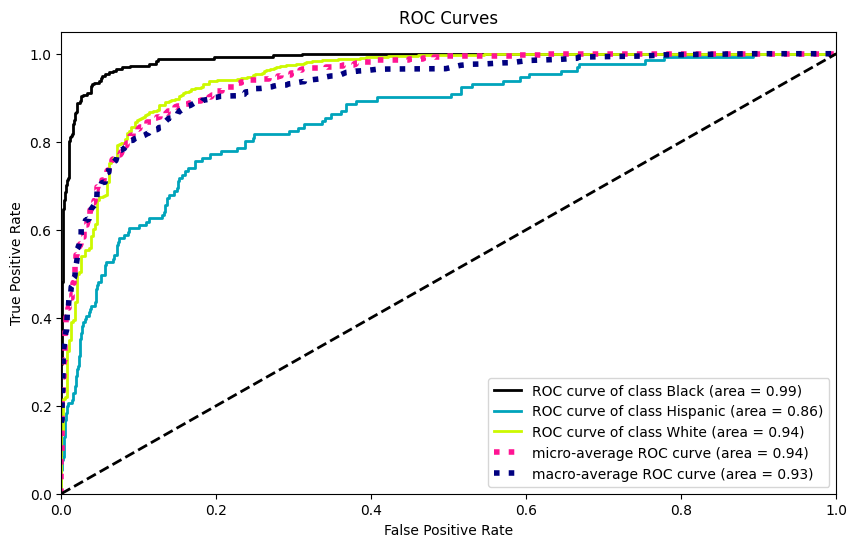

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_proba = pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

### Logistic Model GridsearchCV

In [ ]:
pipe_model.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['Gender'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(class_weight='balanced', random_state=101))],
 'verbose': False,
 'OrdinalEncoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  Index(['Gender'], dtype='object'))],
                   verbose_feature_names_out=False),
 'scaler': StandardScaler(),
 'logistic': Log

In [ ]:
pipe_model.set_params(logistic__C= 1)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=101))])

In [ ]:
from sklearn.model_selection import GridSearchCV

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None]
solver = ["liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

grid_model_log = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall_micro",

                          n_jobs = -1,
                          return_train_score=True)


In [ ]:
grid_model_log.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(C=1,
                                                           class_weight='balanced',
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'sag', 'saga']},
             return_train_score=True, scoring='recall_micro')

In [ ]:
grid_model_log.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1, penalty='l1', random_state=101,
                                    solver='saga'))])

In [ ]:
eval_metric(grid_model_log, X_train, y_train, X_test, y_test)

Test_Set
[[230   6  22]
 [ 10  46  75]
 [  9  22 734]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.91       258
    Hispanic       0.62      0.35      0.45       131
       White       0.88      0.96      0.92       765

    accuracy                           0.88      1154
   macro avg       0.81      0.73      0.76      1154
weighted avg       0.86      0.88      0.86      1154


Train_Set
[[ 952   19   69]
 [  55  221  272]
 [  38   72 2917]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91      1040
    Hispanic       0.71      0.40      0.51       548
       White       0.90      0.96      0.93      3027

    accuracy                           0.89      4615
   macro avg       0.84      0.76      0.79      4615
weighted avg       0.88      0.89      0.88      4615



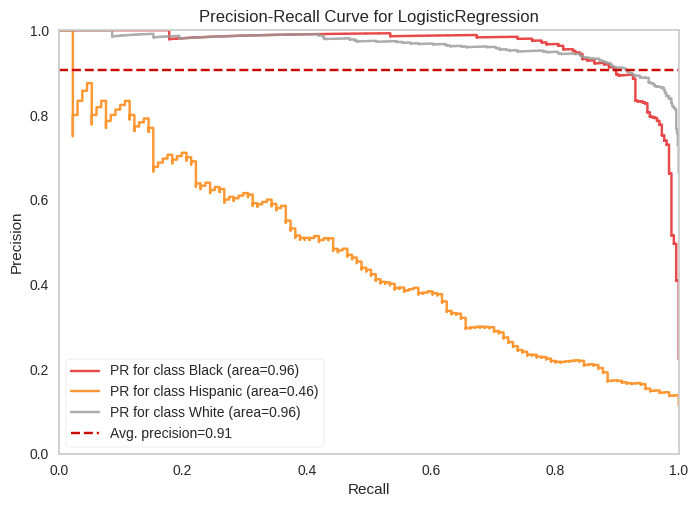

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("logistic", LogisticRegression(class_weight='balanced',random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   # Tabloda isimler gorunsun diye bunu yazdik.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = grid_model_log.predict(X_test)
y_pred_proba = grid_model_log.predict_proba(X_test)

log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_auc = viz.score_["Hispanic"]

## 2. SVC

### Vanilla SVC model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("scv", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations)

pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('scv', SVC(class_weight='balanced', random_state=101))])

In [ ]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[230  20   8]
 [ 13  86  32]
 [ 12 125 628]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       258
    Hispanic       0.37      0.66      0.48       131
       White       0.94      0.82      0.88       765

    accuracy                           0.82      1154
   macro avg       0.74      0.79      0.75      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[ 988   33   19]
 [  25  459   64]
 [  53  394 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1040
    Hispanic       0.52      0.84      0.64       548
       White       0.97      0.85      0.91      3027

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.91      0.87      0.88      4615



In [ ]:
operations = [("OrdinalEncoder", column_trans),("scaler", StandardScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations)

scores = cross_validate(pipe_svc_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_micro','recall_micro','f1_micro'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.814304
train_accuracy           0.872349
test_precision_micro     0.814304
train_precision_micro    0.872349
test_recall_micro        0.814304
train_recall_micro       0.872349
test_f1_micro            0.814304
train_f1_micro           0.872349
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'svc__C': [0.001, 0.05, 0.01, 0.1],
              'svc__gamma': ["scale", "auto", 0.2, 0.3],
              'svc__kernel': ['rbf', 'linear'],
              'svc__class_weight': ["balanced", None]}

In [ ]:
operations = [("OrdinalEncoder",column_trans),("scaler", StandardScaler()), ("svc", SVC(class_weight="balanced",random_state=101, probability=True))]

pipe_svc_model= Pipeline(steps=operations)

grid_model_svc = GridSearchCV(pipe_svc_model,
                              param_grid,
                              scoring="recall_micro",
                              cv=10,
                              return_train_score=True)

In [ ]:
grid_model_svc.fit(X_train, y_train)

In [ ]:
grid_model_svc.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=101))])

In [ ]:
pd.DataFrame(grid_model_svc.cv_results_).loc[grid_model_svc.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.869562
mean_train_score    0.883279
Name: 57, dtype: object

In [ ]:
eval_metric(grid_model_svc, X_train, y_train, X_test, y_test)

Test_Set
[[233   6  19]
 [ 16  38  77]
 [  9  17 739]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       258
    Hispanic       0.62      0.29      0.40       131
       White       0.89      0.97      0.92       765

    accuracy                           0.88      1154
   macro avg       0.80      0.72      0.74      1154
weighted avg       0.86      0.88      0.86      1154


Train_Set
[[ 949   22   69]
 [  55  192  301]
 [  44   58 2925]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91      1040
    Hispanic       0.71      0.35      0.47       548
       White       0.89      0.97      0.93      3027

    accuracy                           0.88      4615
   macro avg       0.83      0.74      0.77      4615
weighted avg       0.87      0.88      0.87      4615



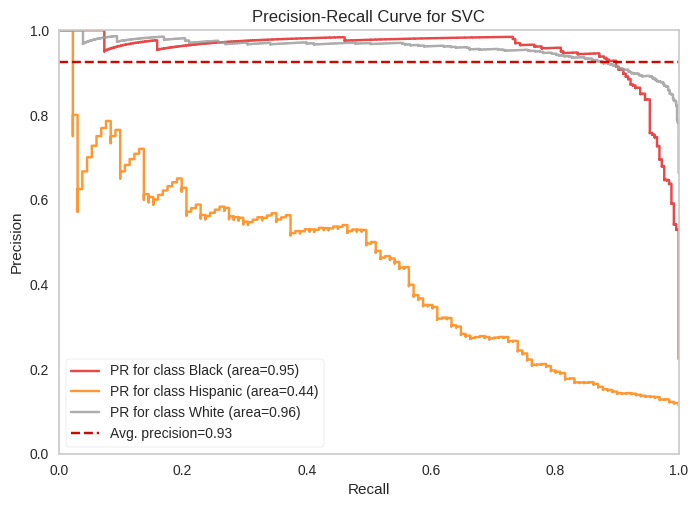

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
operations = [("OrdinalEncoder",column_trans),("scaler", StandardScaler()), ("svc", SVC(probability=True))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White", 'Asian'],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = grid_model_svc.predict(X_test)
y_pred_proba = grid_model_svc.predict_proba(X_test)

svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_auc = viz.score_["Hispanic"]

## 3. RF

### Vanilla RF Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]

pipe_model_rf = Pipeline(steps=operations)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[181   0  77]
 [ 11   0 120]
 [ 10   2 753]]
              precision    recall  f1-score   support

       Black       0.90      0.70      0.79       258
    Hispanic       0.00      0.00      0.00       131
       White       0.79      0.98      0.88       765

    accuracy                           0.81      1154
   macro avg       0.56      0.56      0.56      1154
weighted avg       0.73      0.81      0.76      1154


Train_Set
[[1040    0    0]
 [   0  548    0]
 [   0    0 3027]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1040
    Hispanic       1.00      1.00      1.00       548
       White       1.00      1.00      1.00      3027

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_micro",
                                 "recall_micro",
                                 "f1_micro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.808241
train_accuracy           1.000000
test_precision_micro     0.808241
train_precision_micro    1.000000
test_recall_micro        0.808241
train_recall_micro       1.000000
test_f1_micro            0.808241
train_f1_micro           1.000000
dtype: float64

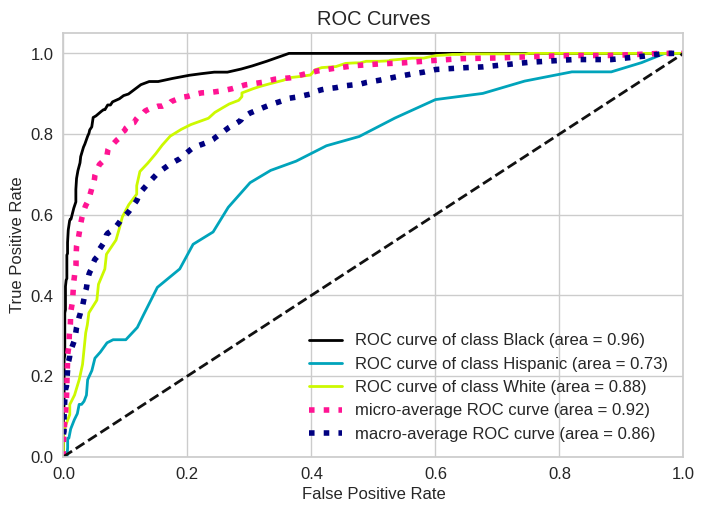

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_proba = pipe_model_rf.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

### Feature Importance

In [ ]:
pipe_model_rf["RF_model"].feature_importances_

array([0.0030343 , 0.00704031, 0.01068022, 0.00774812, 0.00908853,
       0.00740714, 0.00709946, 0.00691682, 0.00832818, 0.02625929,
       0.00794475, 0.00661745, 0.02098244, 0.01017841, 0.01143647,
       0.00785132, 0.00916671, 0.01522951, 0.02545146, 0.02645901,
       0.0083634 , 0.01157798, 0.00830553, 0.00786505, 0.00929045,
       0.00836026, 0.00786637, 0.00586077, 0.01559905, 0.0140674 ,
       0.03175494, 0.03169659, 0.0069949 , 0.00786811, 0.01606065,
       0.00799132, 0.00820699, 0.01945932, 0.00797072, 0.00672136,
       0.00788982, 0.01852583, 0.00760911, 0.01618779, 0.00997902,
       0.00784778, 0.02440315, 0.00827927, 0.00754122, 0.02759465,
       0.0070634 , 0.00696932, 0.00791523, 0.01191208, 0.0132649 ,
       0.00935858, 0.00947953, 0.00828374, 0.00808331, 0.00795443,
       0.01239018, 0.00725807, 0.01969281, 0.00710685, 0.00910135,
       0.00755108, 0.04523403, 0.00627298, 0.01112209, 0.0160527 ,
       0.01138453, 0.00824518, 0.00835963, 0.00857552, 0.00904

In [ ]:
features = pipe_model_rf["OrdinalEncoder"].get_feature_names_out()
features

array(['Gender', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbreadth', 'forearmhandlength',
       'functionalleglength', 'handbreadth', 'handcircumference',
       'handlength'

In [ ]:
rf_feature_imp = pd.DataFrame(data=pipe_model_rf["RF_model"].feature_importances_,
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
sittingheight,0.045234
elbowrestheight,0.031755
eyeheightsitting,0.031697
interpupillarybreadth,0.027595
buttockpopliteallength,0.026459
...,...
sleevelengthspinewrist,0.006273
earbreadth,0.005861
waistdepth,0.005843
weightkg,0.005639


### RF Model GridsearchCV

In [ ]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1.0]}

In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]

model= Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=model,
                             param_grid=param_grid,
                             scoring="recall_micro",
                             n_jobs = -1,
                            verbose= 2).fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [ ]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        max_samples=0.8, min_samples_leaf=4,
                                        n_estimators=200, random_state=101))])

In [ ]:
rf_grid_model.best_params_

{'RF_model__max_depth': 4,
 'RF_model__max_features': 'sqrt',
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 4,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 200}

In [ ]:
rf_grid_model.best_score_

0.6396533044420367

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[201  36  21]
 [ 13  78  40]
 [ 57 269 439]]
              precision    recall  f1-score   support

       Black       0.74      0.78      0.76       258
    Hispanic       0.20      0.60      0.30       131
       White       0.88      0.57      0.69       765

    accuracy                           0.62      1154
   macro avg       0.61      0.65      0.59      1154
weighted avg       0.77      0.62      0.66      1154


Train_Set
[[ 851  121   68]
 [  47  375  126]
 [ 232  963 1832]]
              precision    recall  f1-score   support

       Black       0.75      0.82      0.78      1040
    Hispanic       0.26      0.68      0.37       548
       White       0.90      0.61      0.73      3027

    accuracy                           0.66      4615
   macro avg       0.64      0.70      0.63      4615
weighted avg       0.79      0.66      0.70      4615



In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight='balanced',
                                                  max_depth=4,
                                                  max_features='sqrt',
                                                  max_samples=0.8,
                                                  min_samples_leaf=4,
                                                  min_samples_split=2,
                                                  n_estimators= 200,
                                                  random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_micro",
                                 "recall_micro",
                                 "f1_micro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.640738
train_accuracy           0.668400
test_precision_micro     0.640738
train_precision_micro    0.668400
test_recall_micro        0.640738
train_recall_micro       0.668400
test_f1_micro            0.640738
train_f1_micro           0.668400
dtype: float64

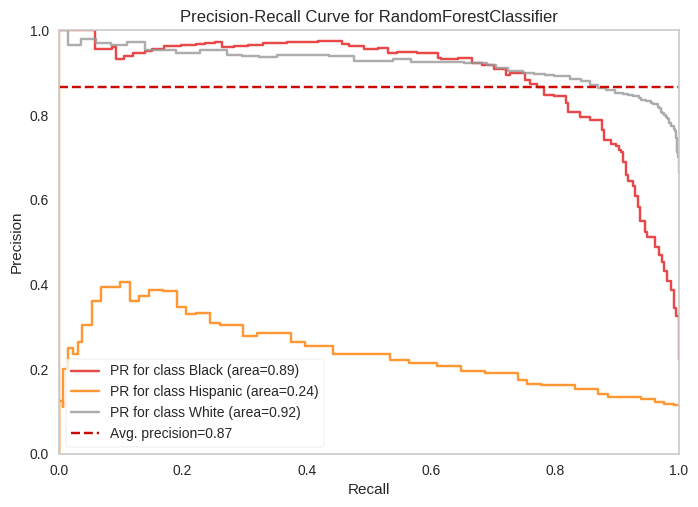

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
operations = [("OrdinalEncoder",column_trans),("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White", 'Asian'],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test)
y_pred_proba = rf_grid_model.predict_proba(X_test)

rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_auc = viz.score_["Hispanic"]

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.utils import class_weight

In [ ]:
y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2})
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})

In [ ]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train_xgb)
classes_weights

array([1.47916667, 0.50820394, 1.47916667, ..., 1.47916667, 0.50820394,
       0.50820394])

In [ ]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}
comp = pd.DataFrame(my_dict)
comp.head()

,weights,label
356,1.479167,0
5968,0.508204,2
673,1.479167,0
4960,0.508204,2
4912,0.508204,2


In [ ]:
comp.groupby("label").value_counts()

label  weights 
0      1.479167    1040
1      2.807178     548
2      0.508204    3027
dtype: int64

In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations)

pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_b...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[217   8  33]
 [ 14  39  78]
 [ 17  32 716]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       258
           1       0.49      0.30      0.37       131
           2       0.87      0.94      0.90       765

    accuracy                           0.84      1154
   macro avg       0.74      0.69      0.71      1154
weighted avg       0.83      0.84      0.83      1154


Train_Set
[[1040    0    0]
 [   0  548    0]
 [   0    0 3027]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       548
           2       1.00      1.00      1.00      3027

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBClassifier(random_state=101))]


model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train_xgb,
                        scoring=["accuracy",
                                 "precision_micro",
                                 "recall_micro",
                                 "f1_micro"],
                        cv=10,
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.846149
train_accuracy           1.000000
test_precision_micro     0.846149
train_precision_micro    1.000000
test_recall_micro        0.846149
train_recall_micro       1.000000
test_f1_micro            0.846149
train_f1_micro           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {"XGB_model__n_estimators":[50, 100, 200],
              "XGB_model__max_depth":[3,4,5],
              "XGB_model__learning_rate": [0.1, 0.2],
              "XGB_model__subsample":[0.5, 0.8, 1],
              "XGB_model__colsample_bytree":[0.5,0.7, 1]}

In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

xgb_grid_model = GridSearchCV(model,
                        param_grid,
                        scoring="f1",
                        verbose=2,
                        n_jobs=-1,
                        return_train_score=True)

xgb_grid_model.fit(X_train,y_train_xgb, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_b...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.7, 1],
                         'XGB_model__learning_rate': [0.1, 0.2],
                         'XGB_model__max_depth': [3, 4, 5],
                         'XGB_model__n_estimators': [50, 100, 200],
                         'XGB_model__subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='f1', verbose=2)

In [ ]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_b...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[216  23  19]
 [ 16  79  36]
 [ 36 155 574]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       258
           1       0.31      0.60      0.41       131
           2       0.91      0.75      0.82       765

    accuracy                           0.75      1154
   macro avg       0.68      0.73      0.68      1154
weighted avg       0.82      0.75      0.78      1154


Train_Set
[[ 923   68   49]
 [  45  400  103]
 [ 141  529 2357]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1040
           1       0.40      0.73      0.52       548
           2       0.94      0.78      0.85      3027

    accuracy                           0.80      4615
   macro avg       0.72      0.80      0.74      4615
weighted avg       0.85      0.80      0.81      4615



In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",XGBClassifier(random_state=101,n_estimators=50,
                      colsample_bytree=0.5,
                      subsample=0.5,
                      learning_rate=0.1,
                      max_depth=3))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train_xgb)
model["XGB_model"].feature_importances_
feats = pd.DataFrame(index=X.columns,
                     data=model["XGB_model"].feature_importances_,
                     columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)
xgb_imp_feats

,xgb_importance
eyeheightsitting,0.074083
footbreadthhorizontal,0.039485
interscyei,0.033932
abdominalextensiondepthsitting,0.026392
sleevelengthspinewrist,0.024744
...,...
earbreadth,0.002581
tragiontopofhead,0.000000
sittingheight,0.000000
waistbacklength,0.000000


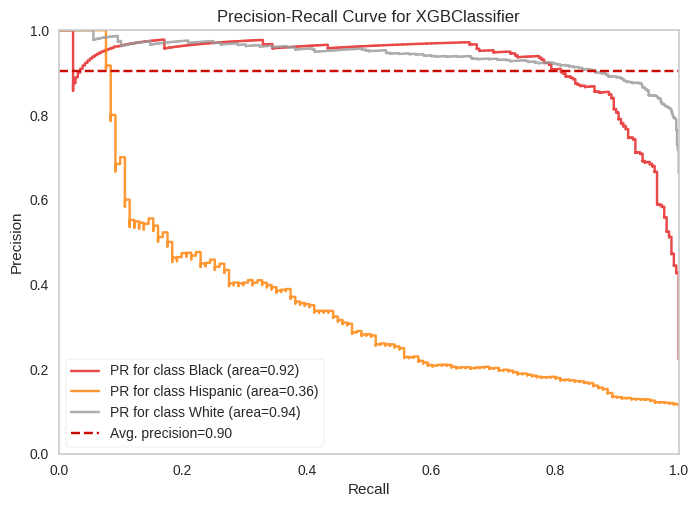

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
operations = [("OrdinalEncoder",column_trans),("XGB_model", XGBClassifier(colsample_bytree=0.5,subsample=0.5,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White", 'Asian'],
    cmap="Set1"
)
viz.fit(X_train, y_train_xgb)
viz.score(X_test, y_test_xgb)
viz.show();

In [ ]:
y_pred = xgb_grid_model.predict(X_test)
y_pred_proba = xgb_grid_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=["Hispanic"])
xgb_auc = viz.score_["Hispanic"]

## Comparing Models

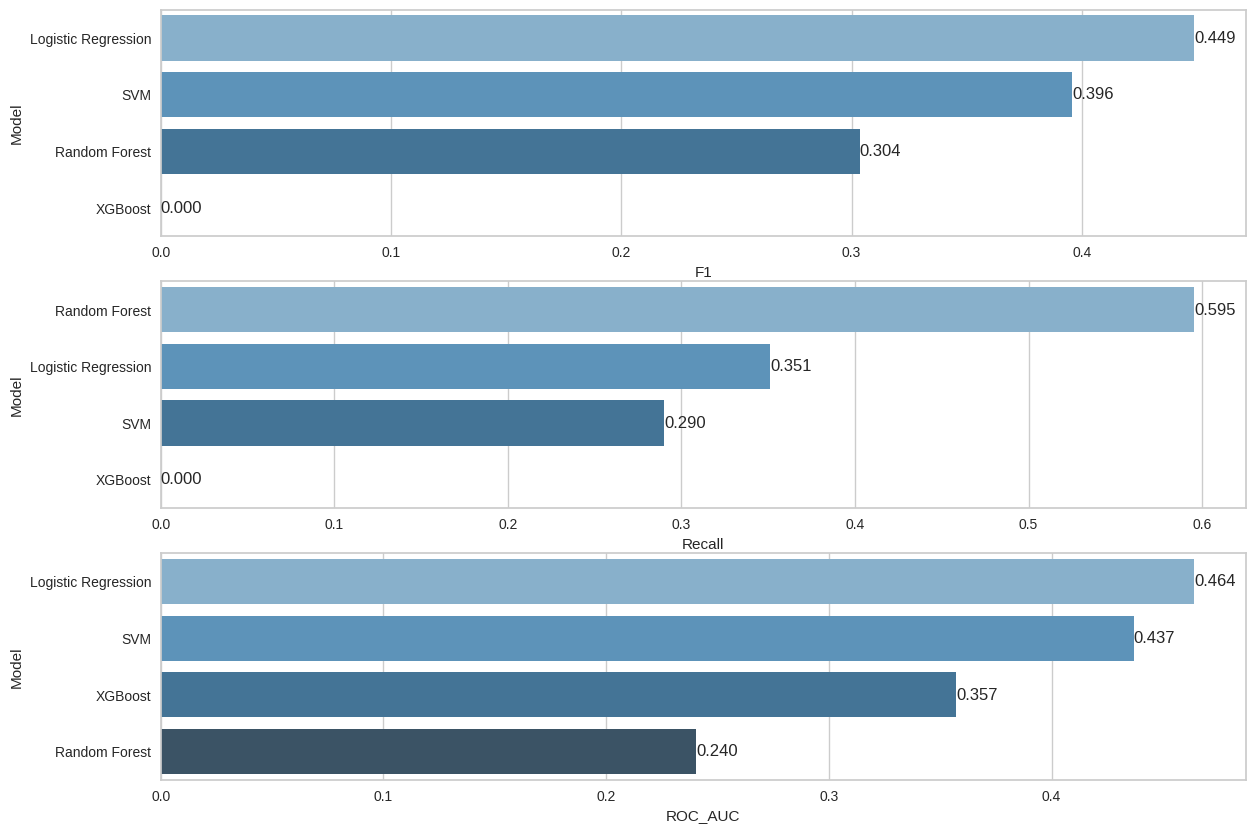

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "ROC_AUC": [log_auc, svc_auc, rf_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width,
                p.get_y() + p.get_height() / 2,
                '{:1.3f}'.format(width),
                ha = 'left',
                va = 'center')

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [57]:
operations = [("OrdinalEncoder", column_trans),("scaler",StandardScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [58]:
final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [59]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,...,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,weightkg,wristcircumference,wristheight
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,...,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,247.254290,1408.630265,328.071590,225.201768,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,...,884.659386,1632.470966,460.990293,318.409950,916.817126,230.459178,377.352054,800.981106,169.308372,831.334547
std,37.457748,78.303123,20.444554,15.965783,16.803556,13.379000,30.124094,41.270615,19.239580,42.011888,...,53.766243,98.204399,36.706353,36.395675,114.386464,35.691681,31.714316,155.990338,13.060900,47.321580
min,155.000000,1146.000000,249.000000,156.000000,186.000000,151.000000,283.000000,216.000000,197.000000,357.000000,...,660.000000,1342.000000,345.000000,211.000000,611.000000,138.000000,289.000000,358.000000,124.000000,688.000000
25%,220.000000,1353.000000,314.000000,214.000000,233.000000,186.000000,377.000000,312.000000,262.000000,461.000000,...,847.000000,1561.000000,435.000000,292.000000,831.000000,204.000000,355.000000,686.000000,159.000000,798.000000
50%,243.000000,1412.000000,328.000000,225.000000,245.000000,196.000000,404.000000,342.000000,274.000000,493.000000,...,883.000000,1631.000000,463.000000,316.000000,910.000000,226.000000,376.000000,790.000000,171.000000,831.000000
75%,272.000000,1464.000000,342.000000,235.000000,256.000000,205.000000,422.000000,370.000000,288.000000,520.000000,...,920.000000,1697.000000,486.000000,344.000000,995.000000,253.000000,398.000000,900.000000,179.000000,864.000000
max,451.000000,1683.000000,393.000000,293.000000,306.000000,245.000000,489.000000,490.000000,362.000000,637.000000,...,1095.000000,1991.000000,598.000000,461.000000,1379.000000,406.000000,494.000000,1442.000000,216.000000,1009.000000


In [60]:
female_mean = X[X.Gender=="Female"].describe(include="all").loc["mean"]
female_mean

abdominalextensiondepthsitting     230.167914
acromialheight                    1337.080214
acromionradialelength              311.917112
anklecircumference                 216.050267
balloffootcircumference             228.23262
                                     ...     
waistfrontlengthsitting            355.114439
weightkg                           680.605882
wristcircumference                 155.004278
wristheight                        794.997326
Gender                                    NaN
Name: mean, Length: 85, dtype: object

In [61]:
female_mean["Gender"] = "Female"

In [62]:
pd.DataFrame(female_mean).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,weightkg,wristcircumference,wristheight,Gender
mean,230.167914,1337.080214,311.917112,216.050267,228.23262,182.378075,365.723529,306.391444,273.383957,450.853476,...,1560.928877,425.487166,300.268449,862.134759,213.567914,355.114439,680.605882,155.004278,794.997326,Female


In [63]:
final_model.predict(pd.DataFrame(female_mean).T)

array(['Hispanic'], dtype=object)

In [64]:
final_model.predict(X.loc[[200]])

array(['Hispanic'], dtype=object)

In [65]:
y[200]

'Hispanic'

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [65]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline


In [46]:
column_trans = make_column_transformer((OrdinalEncoder(), cat),
                                       remainder=StandardScaler())

In [47]:
X_train_ohe = column_trans.fit_transform(X_train)

In [48]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)
#data train ve test olarak ayrilir, sonra over-under sampling yapilir.

In [49]:
X_train_over.shape

(9081, 85)

In [50]:
y_train_over.value_counts()

Black       3027
White       3027
Hispanic    3027
Name: DODRace, dtype: int64

In [51]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [52]:
X_train_under.shape

(1644, 85)

In [53]:
y_train_under.value_counts()

Black       548
Hispanic    548
White       548
Name: DODRace, dtype: int64

In [54]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})
 # bu sayilari deneme yanilma ile buluyoruz.bu sayilar %20-%30 civarinda olmali

In [55]:
y_train.value_counts()# orjinal sayilar

White       3027
Black       1040
Hispanic     548
Name: DODRace, dtype: int64

In [56]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [57]:
y_resampled_over.value_counts()

White       3027
Black       1040
Hispanic    1000
Name: DODRace, dtype: int64

In [58]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)


In [59]:
y_resampled_under.value_counts()

White       2500
Black       1040
Hispanic     548
Name: DODRace, dtype: int64

## Logistic Regression Over/ Under Sampling

In [60]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()),
              ('o', over),
              ('u', under),
              ("log", LogisticRegression(C=0.2,
                                         random_state=101))]

In [66]:
smote_pipeline = imbpipeline(steps=operations)

In [67]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['Gender'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(C=0.2, random_state=101))])

In [68]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[228  13  17]
 [  9  79  43]
 [  9  59 697]]
              precision    recall  f1-score   support

       Black       0.93      0.88      0.90       258
    Hispanic       0.52      0.60      0.56       131
       White       0.92      0.91      0.92       765

    accuracy                           0.87      1154
   macro avg       0.79      0.80      0.79      1154
weighted avg       0.88      0.87      0.87      1154


Train_Set
[[ 940   46   54]
 [  47  302  199]
 [  41  210 2776]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91      1040
    Hispanic       0.54      0.55      0.55       548
       White       0.92      0.92      0.92      3027

    accuracy                           0.87      4615
   macro avg       0.79      0.79      0.79      4615
weighted avg       0.87      0.87      0.87      4615



In [79]:
model = imbpipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["recall_micro", "precision_micro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_recall_micro        0.802612
train_recall_micro       0.820272
test_precision_micro     0.802612
train_precision_micro    0.820272
dtype: float64

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

featurelar arasindaki yüksek korelasyonu dikkate alarak feature importance yapiyor.Shap skorlarini almadan önce en iyi skoru veren model tespit edilmeli.KNN ve SVM icin feature selection döndürür.

In [56]:
column_trans_shap = make_column_transformer((OrdinalEncoder(), cat),
                                             remainder=StandardScaler(),
                                             verbose_feature_names_out=False)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(C=0.4,
                                class_weight='balanced',
                                random_state=101,
                                penalty="l1",
                                solver='saga')

model_shap.fit(X_train_trans, y_train)

LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                   random_state=101, solver='saga')

In [57]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[231  20   7]
 [  9  95  27]
 [ 11 140 614]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       258
    Hispanic       0.37      0.73      0.49       131
       White       0.95      0.80      0.87       765

    accuracy                           0.81      1154
   macro avg       0.75      0.81      0.76      1154
weighted avg       0.88      0.81      0.83      1154


Train_Set
[[ 942   78   20]
 [  47  399  102]
 [  53  538 2436]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90      1040
    Hispanic       0.39      0.73      0.51       548
       White       0.95      0.80      0.87      3027

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.88      0.82      0.84      4615



In [62]:
operations = [("OrdinalEncoder", column_trans_shap),
              ("log", LogisticRegression(C=0.4,
                                         class_weight='balanced',
                                         random_state=101,
                                         penalty="l1",
                                         solver='saga'))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["recall_micro", "precision_micro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_recall_micro        0.802612
train_recall_micro       0.820272
test_precision_micro     0.802612
train_precision_micro    0.820272
dtype: float64

In [63]:
features = column_trans_shap.get_feature_names_out()
features

array(['Gender', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbreadth', 'forearmhandlength',
       'functionalleglength', 'handbreadth', 'handcircumference',
       'handlength'

In [71]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.9/451.9 kB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 33.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [60]:
import shap

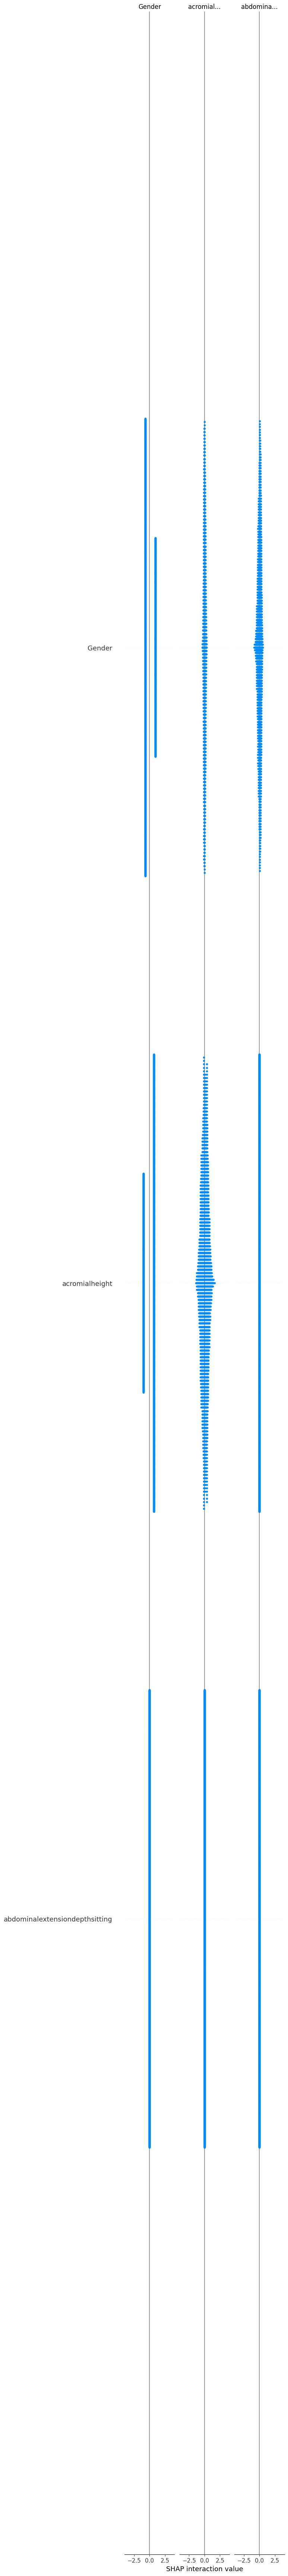

In [74]:
explainer = shap.LinearExplainer(model_shap, X_train_trans)
shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, 
                  max_display=300, 
                  features = features,
                  plot_type='bar',
                  plot_size=(10,10), show_values_in_legend=True,
                  class_names=["black", "hispanic", "white"])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___